# Assignment 1
In this assignment you will create a model that is able to detect fraudulent credit card transactions. The structure of this assignment is as follows:

1. Loading the data
1. Slicing the data into a training, validation and test set
1. Normalising the data
1. Building and training an initial model
1. Improving to model such that it has sufficient capacity
1. Evaluating your trained model on the test set

As always, first we load Keras and some helper functions:

In [1]:
library(keras)
source('assignment-1-helpers.R')

## Exercise 1: loading the data
Load the dataset from the `dataset_creditcard_fraud_shuffled` function like we have done in the previous notebooks. Store the data in variables `x` and `y`.

Inspect the data set and its dimensions using the `head` and `dim` functions. How many feature columns do we have? How many samples? Write down your answer as a comment in the second cell below.

In [2]:
data = dataset_creditcard_fraud_shuffled()

In [3]:
dim(data$x)
length(data$y)

[1] 28430    29

[1] 28430

In [4]:
head(data$x)

PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,⋯,PCA20,PCA21,PCA22,PCA23,PCA24,PCA25,PCA26,PCA27,PCA28,amount
-17.728424,12.0652097,-19.2080177,10.364634,-15.394158,2.9465088,-21.1939473,-3.9091765,-10.059195,-14.88211218,⋯,1.3902905,-9.171033,-0.9283097,1.199864,-0.5620505,-4.3015000,-0.04667275,-5.4138579,2.1205683,6.263980
-11.764058,10.2011597,-10.0636887,4.750370,-16.151861,-0.6924006,-14.8669600,5.7852511,-8.982269,-14.25273354,⋯,-2.2137487,-3.070527,-0.9638588,-1.264751,4.2578387,-8.7934581,-1.03754432,-0.4815245,0.6600051,9.688198
-0.118736,5.1274232,5.1411879,2.981300,-4.726511,1.4498411,-1.1743960,2.5249952,6.215809,-0.71024872,⋯,-3.0816580,-1.551779,6.4548451,4.041127,-5.3858464,-2.9652579,4.42567222,-4.2679673,-3.0555873,2.610000
-2.400023,0.8530673,-0.3470566,6.537439,-7.072598,-0.7300345,4.8834112,-1.6991630,-2.770298,-6.03156580,⋯,0.5833547,2.490629,-0.4888624,-2.728449,1.5979380,-0.2838776,0.24759498,-0.4880894,1.3491211,1366.258812
1.424880,-0.3157700,-1.3526721,-2.546808,1.097185,-1.6850043,-0.6143261,2.9130668,-2.123813,-4.90359762,⋯,-2.2775988,2.167195,3.1534405,-2.479621,-0.5063742,1.4602372,-2.08786796,-1.8536255,1.0995925,45.000000
7.944721,-5.9233979,5.7461673,1.615824,-1.932776,-2.1687800,-3.4499307,0.5798105,-4.008190,-0.08217219,⋯,3.3530743,1.163265,-1.2697172,-2.751685,1.2168838,-0.9958610,3.78716419,-2.7278938,-3.5916259,1.000000


In [5]:
mean(data$x[,29])
sd(data$x[,29])

[1] 102.5304

[1] 239.0236

**Answer**: we have 29 feature columns: 28 PCA columns and one for the transaction amount. There are 28.430 samples (rows). 

## Exercise 2: splitting the data
Divide the data set into a training and test set, split 80%-20%. Divide the training set again into a training and validation set, again split 80%-20%. Show the dimensions of the three different sets.

In [6]:
index <- 0.8 * length(data$y)
x_test <- data$x[-(1:index),]
y_test <- data$y[-(1:index)]

x_train <- data$x[1:index,]
y_train <- data$y[1:index]

index <- 0.8 * length(y_train)
x_val <- x_train[-(1:index),]
y_val <- y_train[-(1:index)]

x_train <- x_train[1:index,]
y_train <- y_train[1:index]

In [7]:
dim(x_test)
dim(x_val)
dim(x_train)

[1] 5686   29

[1] 4549   29

[1] 18195    29

## Exercise 3: normalising the data
Inspect the data set with `head`. You will see that the first 28 columns of `x` are the output of a principal components analysis (PCA) transformation. The last column, `amount`, is the amount charged.
`y` contains the labels, where a value of `1` denotes fraud, `0` no fraud.

Normalise the `amount` column in the training, validation and test sets by **standardising** the values. That is: converting all values in this column into **z-scores**. You can do this by subtracting the column's mean from the values, and then dividing the resulting values by the standard deviation of the column, like so:

$$
z = \frac{x - \mu}{\sigma}
$$

You can either do this by hand, or use R's [`scale`](https://www.rdocumentation.org/packages/base/versions/3.5.1/topics/scale) function for this.

**Hint**: be careful to minimise **information leakage** across the data sets. Calculate the mean and standard deviation on the training set, then use these values to standardise the training set, validation set and test set.

In [8]:
# There are various ways of doing this, your implementation may be different

amount_mean <- mean(x_train[,29])  # 29th column is the amount column
amount_sd <- sd(x_train[,29])

amount_mean
amount_sd

# We normalise the amount column of EVERY set (training, validation, test) by the mean and SD of that of the
# training set.

x_train[,29] <- (x_train[, 29] - amount_mean) / amount_sd
x_val[,29] <- (x_val[, 29] - amount_mean) / amount_sd
x_test[,29] <- (x_test[, 29] - amount_mean) / amount_sd

cat('Amount mean/SD training set:   ', mean(x_train[, 29]), '/', sd(x_train[, 29]), '\n', sep='')
cat('Amount mean/SD validation set: ', mean(x_val[, 29]), '/', sd(x_val[, 29]), '\n', sep='')
cat('Amount mean/SD test set:       ', mean(x_test[, 29]), '/', sd(x_test[, 29]), '\n', sep='')

[1] 101.3659

[1] 234.6767

Amount mean/SD training set:   -2.966281e-18/1
Amount mean/SD validation set: 0.001060155/0.9833526
Amount mean/SD test set:       0.02396205/1.101492


In [9]:
head(x_train)

PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,⋯,PCA20,PCA21,PCA22,PCA23,PCA24,PCA25,PCA26,PCA27,PCA28,amount
-17.728424,12.0652097,-19.2080177,10.364634,-15.394158,2.9465088,-21.1939473,-3.9091765,-10.059195,-14.88211218,⋯,1.3902905,-9.171033,-0.9283097,1.199864,-0.5620505,-4.3015000,-0.04667275,-5.4138579,2.1205683,-0.4052466
-11.764058,10.2011597,-10.0636887,4.750370,-16.151861,-0.6924006,-14.8669600,5.7852511,-8.982269,-14.25273354,⋯,-2.2137487,-3.070527,-0.9638588,-1.264751,4.2578387,-8.7934581,-1.03754432,-0.4815245,0.6600051,-0.3906554
-0.118736,5.1274232,5.1411879,2.981300,-4.726511,1.4498411,-1.1743960,2.5249952,6.215809,-0.71024872,⋯,-3.0816580,-1.551779,6.4548451,4.041127,-5.3858464,-2.9652579,4.42567222,-4.2679673,-3.0555873,-0.4208168
-2.400023,0.8530673,-0.3470566,6.537439,-7.072598,-0.7300345,4.8834112,-1.6991630,-2.770298,-6.03156580,⋯,0.5833547,2.490629,-0.4888624,-2.728449,1.5979380,-0.2838776,0.24759498,-0.4880894,1.3491211,5.3899389
1.424880,-0.3157700,-1.3526721,-2.546808,1.097185,-1.6850043,-0.6143261,2.9130668,-2.123813,-4.90359762,⋯,-2.2775988,2.167195,3.1534405,-2.479621,-0.5063742,1.4602372,-2.08786796,-1.8536255,1.0995925,-0.2401853
7.944721,-5.9233979,5.7461673,1.615824,-1.932776,-2.1687800,-3.4499307,0.5798105,-4.008190,-0.08217219,⋯,3.3530743,1.163265,-1.2697172,-2.751685,1.2168838,-0.9958610,3.78716419,-2.7278938,-3.5916259,-0.4276773


In [10]:
head(x_val)

PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,⋯,PCA20,PCA21,PCA22,PCA23,PCA24,PCA25,PCA26,PCA27,PCA28,amount
-1.7748999,-2.7367245,-1.872263,1.6415019,-5.000189,0.4823993,-0.8450675,0.1615184,-0.2005096,-0.06693522,⋯,-0.7023142,-4.8557000,-1.22429689,-2.869582,-1.2018243,-1.50313423,1.5642135,-1.3626741,3.53964908,0.2365758
-6.1643467,3.9584143,-5.802699,0.8204348,-5.800256,-1.0446955,-5.9621255,1.7672316,-1.1793755,-3.99021178,⋯,-1.2106780,4.1172240,2.49158221,0.599547,2.0483179,-3.65170396,0.8458653,1.5219093,4.37966505,-0.4280498
2.3513469,0.8437904,-3.906208,5.9844304,-1.366938,-0.1962358,7.5068564,-0.9556089,-3.2007633,-3.32702428,⋯,2.3444436,0.8725509,2.14301372,2.251499,-0.7527381,0.09839726,-0.2503512,-2.4412159,0.09227252,-0.4287422
0.2093661,1.1529758,0.935441,-0.6937118,2.197274,0.6402989,1.3486392,0.9201080,0.7683515,2.89504324,⋯,-0.3069566,0.6645805,-2.33306386,1.607682,-3.0082843,0.73708095,0.4845496,-0.9177301,2.64592220,-0.3560895
2.0631159,2.6211090,0.310598,3.1605045,2.747807,-2.9436795,-0.5683818,2.6126404,0.4589860,1.66293902,⋯,1.1118559,0.6898615,0.05536347,-2.296091,2.5067413,-2.56768516,1.4600464,-2.9189979,-3.78863774,-0.3285196
-1.4242757,-4.6134782,2.662977,3.1195504,-1.723416,-2.0255767,-2.7563250,1.7351703,2.7520645,1.72517549,⋯,2.3166471,3.4219752,0.37071428,3.359378,2.3103232,1.40372629,0.1872214,-3.6875962,-0.87155183,-0.1013134


In [11]:
head(x_test)

PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,⋯,PCA20,PCA21,PCA22,PCA23,PCA24,PCA25,PCA26,PCA27,PCA28,amount
0.6792063,-1.492826,3.617092,3.088515,-3.885152,0.09659951,2.518421,2.5577722,0.8787746,-1.4421448,⋯,-1.442380,1.7413289,-1.7475286,-1.414753,-0.1872555,2.6470320,2.1201881,0.7984374,-0.6437759,-0.40424084
4.1343911,1.189326,-3.003735,3.178900,1.568001,0.97014283,1.219899,0.7436794,0.5260073,3.0433233,⋯,1.181326,-7.3034550,1.1402128,-1.034525,1.9907367,0.1071861,-3.6315379,-4.5887555,-0.9411048,-0.42870003
-8.3734932,2.656491,-20.155940,9.545950,-6.001181,-2.34481717,-15.057413,8.4621711,-4.7825529,-14.8676401,⋯,-3.010549,0.5352729,4.9664918,-1.941340,5.0622090,0.7489081,3.1032726,-1.7524406,-0.1488145,-0.09956633
-0.4527689,-1.481787,3.550296,2.500334,-3.088460,2.38096824,-1.148760,1.1937016,-0.5240134,3.3442912,⋯,-3.341389,-3.0527038,-1.4509187,-1.421225,1.1600595,-3.6744055,-5.5670244,0.2551340,-0.3142679,-0.24018534
-13.3282602,8.748941,-16.813107,4.232009,-8.326435,-1.62589148,-12.254195,2.7593120,-2.8402229,-11.5353669,⋯,1.248283,-1.1519980,6.0166117,-2.197138,1.7302731,-1.8244772,0.8079507,-2.1336338,2.2264746,-0.42751076
-0.5552165,3.583892,-4.772160,9.415258,1.516715,-2.48004781,-1.103426,2.2966808,-4.5356709,0.6018345,⋯,-1.906707,-1.6944255,-0.7580767,2.742174,-4.8746446,-1.7705598,3.0092372,-3.4530784,1.5612113,-0.42446202


## Exercise 4: building an initial model
Build a neural network suitable for this binary classification problem. As a start, build the network according to the following specifications:

1. Architecture: a single hidden layer with four neurons
1. Optimizer: ADAM, with learning rate 0.001
1. Number of epochs: 250

We will leave the rest of the network configuration up to you. Please try to remember the rules of thumb we mentioned in the slides.

Train the network with these settings, and show the loss and accuracy plot. Do you think this particular network has sufficient capacity to model the problem? Why or why not? Motivate your answer in a few sentences.

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 4)                       120         
________________________________________________________________________________
dense_1 (Dense)                     (None, 1)                       5           
Total params: 125
Trainable params: 125
Non-trainable params: 0
________________________________________________________________________________


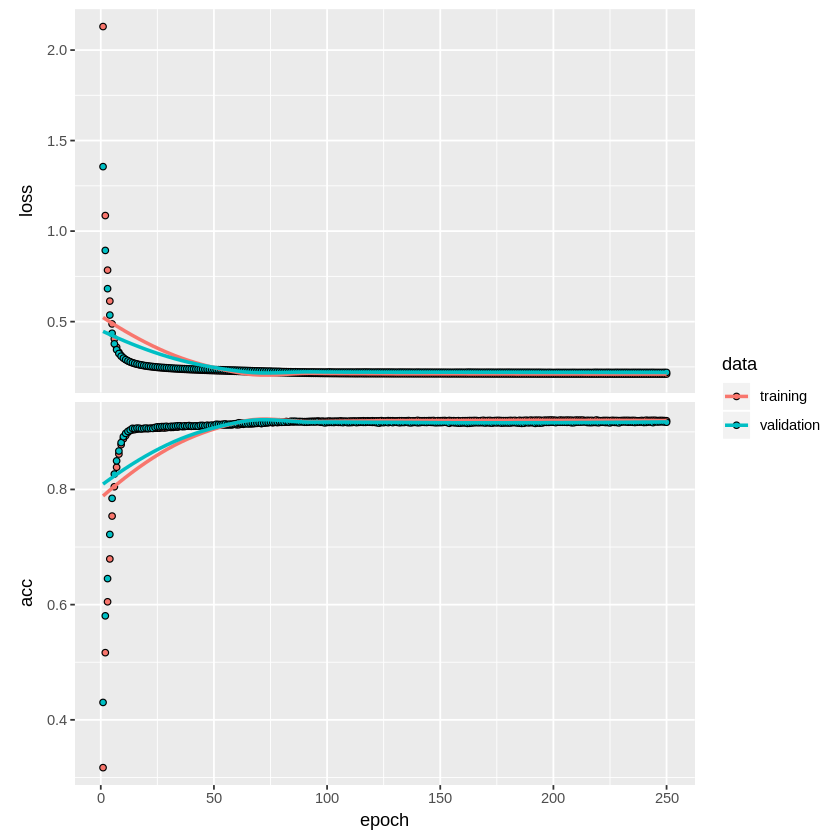

In [12]:
model <- keras_model_sequential() %>%
    layer_dense(units = 4, activation = "relu", input_shape = 29) %>%
    layer_dense(units = 1, activation = "sigmoid")

cat(summary(model))

model %>% compile(
    optimizer = optimizer_adam(lr = 0.001),
    loss = "binary_crossentropy",
    metrics = c("accuracy")
)

history <- model %>% fit(
    x = x_train,
    y = y_train,
    validation_data = list(x_val, y_val),
    epochs = 250,
    batch_size = 256,
    callbacks=list(Progress$new())
)
plot(history)

**Answer**: given sufficient capacity the training loss of the model should approach zero. However, even after 250 epochs the training loss is not even close to zero, and after 50 epochs the training loss flatlines. This is a clear sign of a model that does not have enough capacity to model this problem.

## Exercise 5: improving the model
Increase model capacity and try to obtain close to zero loss on the training set (and an accuracy of 1). You can also modify the learning rate, batch size or any other hyperparameter you see fit.

Show the loss and accuracy graph. Around what epoch does the model start overfitting given your model? Motivate your answer with a few sentences.

**Hint**: try not to create an overly complex model. The number of parameters should be in the low ten thousands.

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_2 (Dense)                     (None, 128)                     3840        
________________________________________________________________________________
dense_3 (Dense)                     (None, 64)                      8256        
________________________________________________________________________________
dense_4 (Dense)                     (None, 1)                       65          
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
________________________________________________________________________________


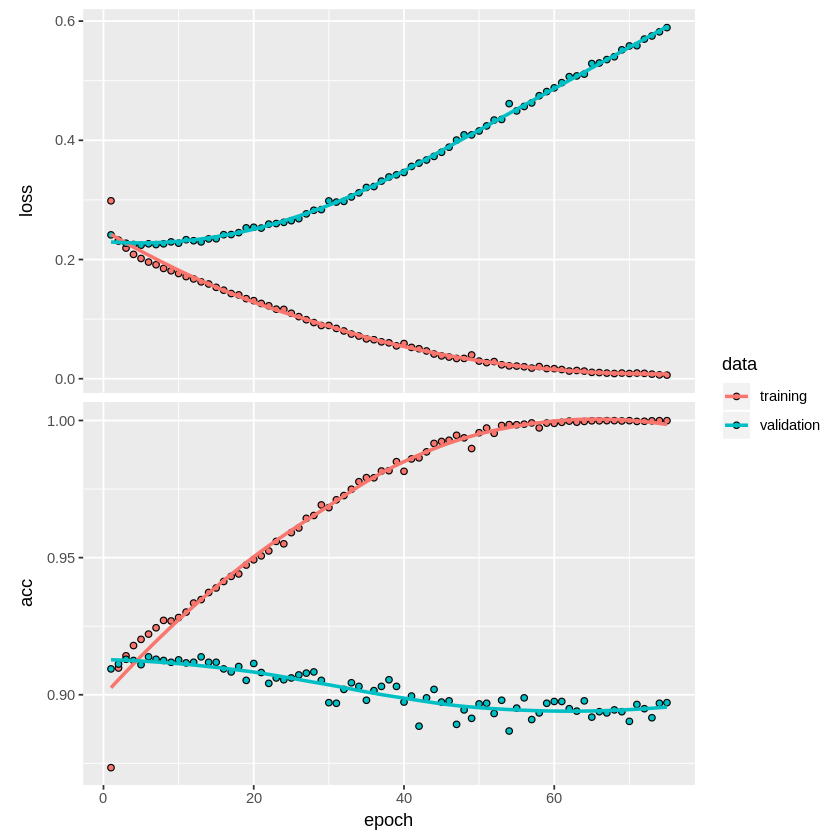

In [13]:
model <- keras_model_sequential() %>%
    layer_dense(units = 128, activation = "relu", input_shape = 29) %>%
    layer_dense(units = 64, activation = "relu") %>%
    layer_dense(units = 1, activation = "sigmoid")

cat(summary(model))

model %>% compile(
    optimizer = optimizer_adam(lr = 0.001),
    loss = "binary_crossentropy",
    metrics = c("accuracy")
)

history <- model %>% fit(
    x = x_train,
    y = y_train,
    validation_data = list(x_val, y_val),
    epochs = 75,
    batch_size = 256,
    callbacks=list(Progress$new())
)
plot(history)

**Answer**: your network architecture and hyperparameters may differ from the ones above. There is no one good architecture and/or set of hyperparameters. We generally want to see a relatively smooth convergence of the training loss to zero (and the training accuracy to 1). The batch size and learning rate will affect your convergence rate, but you should aim for convergence in a few dozen to a hundred epochs.

The gap between the validation and training loss is widening almost from epoch 2 or 3 onwards, indicating overfitting. We would stop just a little later, at epoch 5, where we see the validation loss increase again. This is the inflection point, which is where we would apply early stopping.

## Exercise 6: evaluating the model
Train your model again, this time with the number of epochs just lower than where you would start overfitting. 

Evaluate your model on the test set and report the final loss and accuracy. The accuracy should be close to the accuracy you got on your validation set, and is usually slightly lower. Why is that? Motivate your answer in a few sentences.

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_5 (Dense)                     (None, 128)                     3840        
________________________________________________________________________________
dense_6 (Dense)                     (None, 64)                      8256        
________________________________________________________________________________
dense_7 (Dense)                     (None, 1)                       65          
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
________________________________________________________________________________


$loss
[1] 0.2222311

$acc
[1] 0.9147028

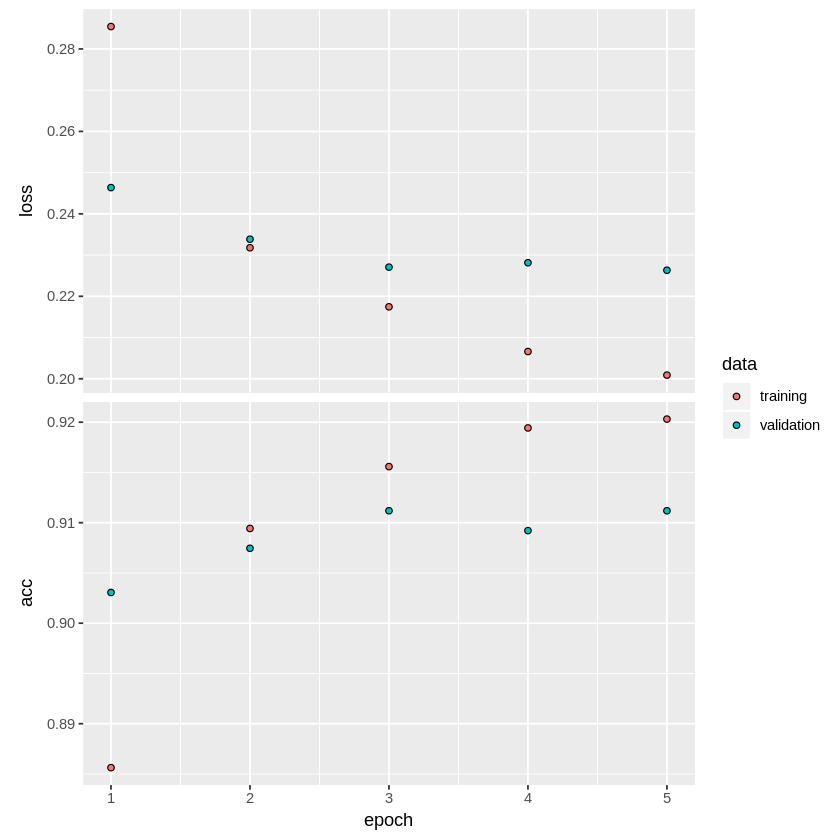

In [14]:
model <- keras_model_sequential() %>%
    layer_dense(units = 128, activation = "relu", input_shape = 29) %>%
    layer_dense(units = 64, activation = "relu") %>%
    layer_dense(units = 1, activation = "sigmoid")

cat(summary(model))

model %>% compile(
    optimizer = optimizer_adam(lr = 0.001),
    loss = "binary_crossentropy",
    metrics = c("accuracy")
)

history <- model %>% fit(
    x = x_train,
    y = y_train,
    validation_data = list(x_val, y_val),
    epochs = 5,
    batch_size = 256,
    callbacks=list(Progress$new())
)
plot(history)

model %>% evaluate(x_test, y_test)

**Answer**: the validation accuracy at the end of training in our case was ~ .91. Yours may differ from this number depending on your choice of network architecture and hyperparameters. The test set accuracy is higher than our validation set accuracy, which means we got quite lucky.

Typically, performance on the test set is usually lower than that on the validation set. The reason is that we have not seen the data in this set, and neither has the model. We cannot train on this data, and also cannot use it to tweak our hyperparameters or network architecture with - it is truly unseen data.